In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [55]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  Data Preprocessing

In [56]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
df.shape

(303, 14)

In [59]:
# Checking for missing values.
df.isnull().values.any()

np.False_

In [60]:
# Checking for imbalanced data based on sex.
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [61]:
# Checking for imbalanced data based on outcome.
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

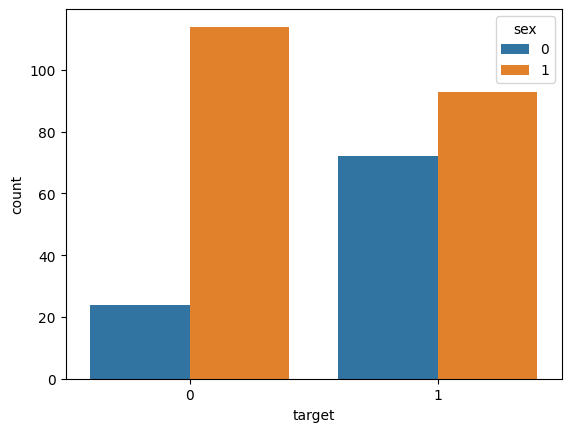

In [62]:
sns.countplot(x=df['target'],hue='sex',data=df)

<Axes: xlabel='target', ylabel='count'>

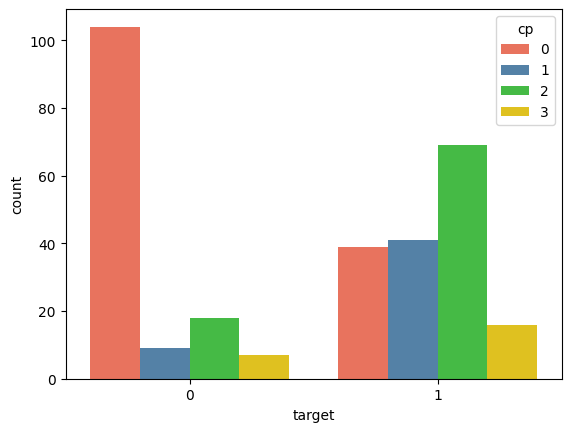

In [63]:
sns.countplot(x=df['target'],hue='cp',data=df, palette=['#FF6347', '#4682B4', '#32CD32', '#FFD700'])

<Axes: xlabel='sex', ylabel='count'>

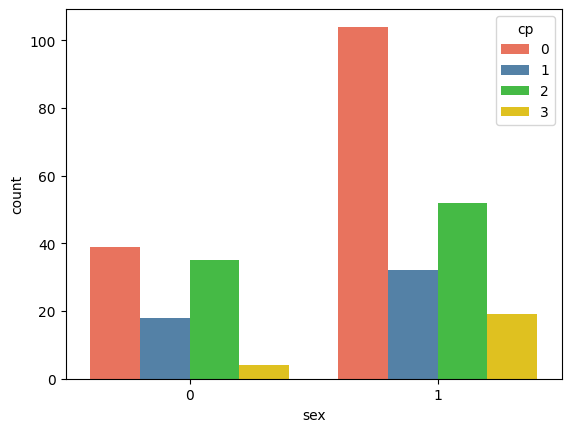

In [64]:
sns.countplot(x=df['sex'],hue='cp',data=df, palette=['#FF6347', '#4682B4', '#32CD32', '#FFD700'])

<Axes: xlabel='sex', ylabel='trestbps'>

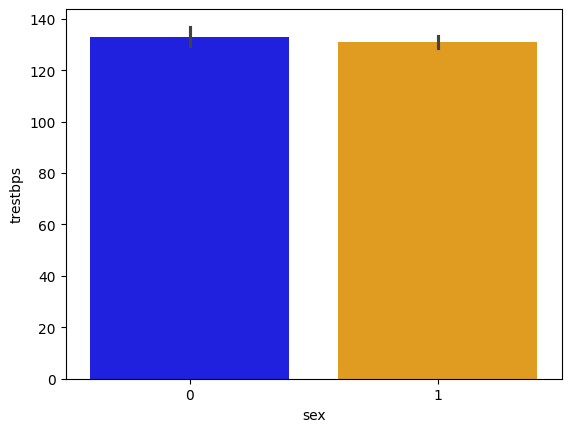

In [65]:
sns.barplot(x=df['sex'],y=df['trestbps'],data=df, palette=['blue', 'orange'])

<Axes: xlabel='sex', ylabel='chol'>

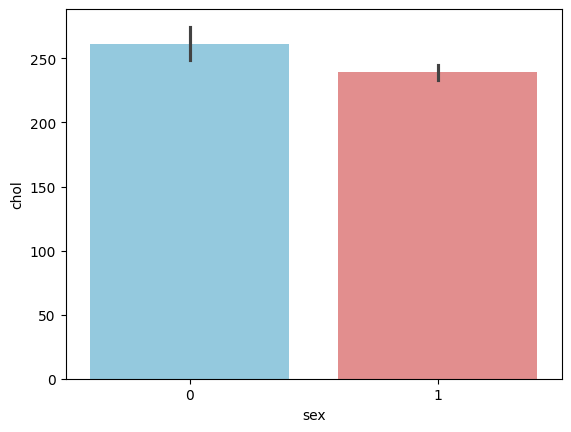

In [66]:
sns.barplot(x=df['sex'],y=df['chol'],data=df, palette=['skyblue', 'lightcoral'])

<Axes: xlabel='target', ylabel='chol'>

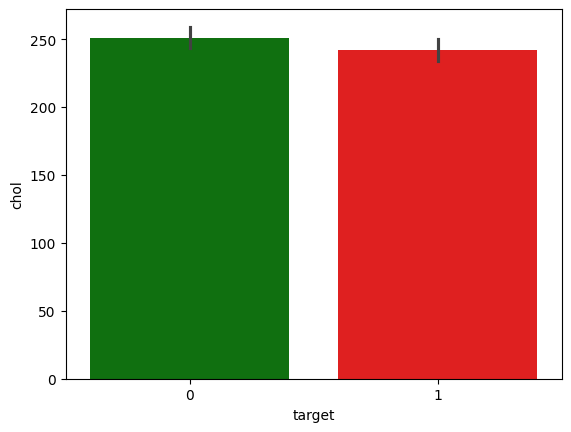

In [67]:
sns.barplot(x=df['target'],y=df['chol'],data=df, palette=['green', 'red'])

<Axes: xlabel='target', ylabel='trestbps'>

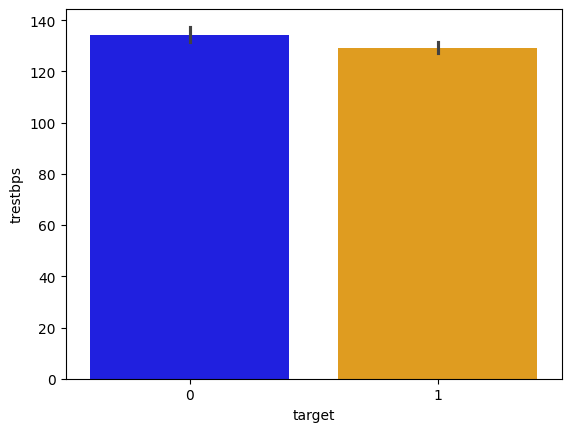

In [68]:
sns.barplot(x=df['target'],y=df['trestbps'],data=df, palette=['blue', 'orange'])

<Axes: xlabel='age', ylabel='trestbps'>

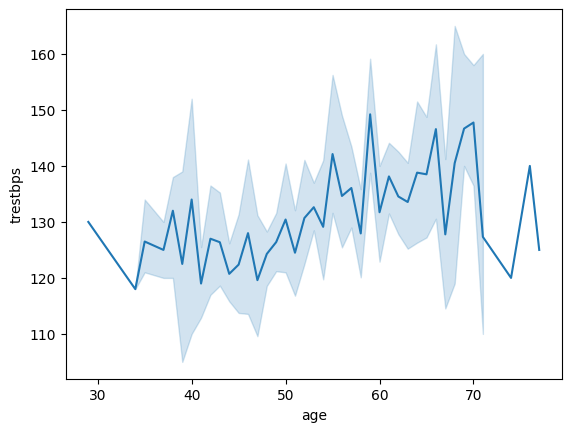

In [69]:
sns.lineplot(x=df['age'],y=df['trestbps'],data=df)

<Axes: xlabel='age', ylabel='chol'>

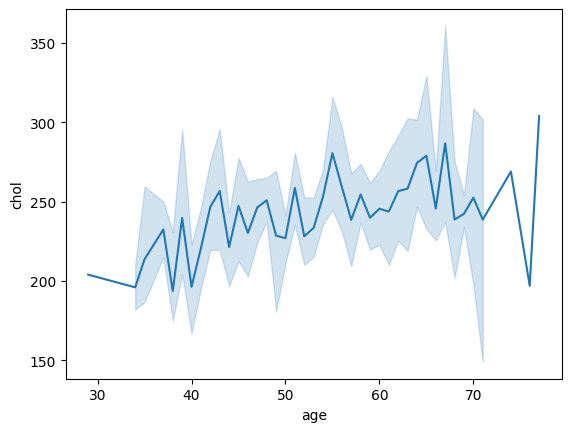

In [70]:
sns.lineplot(x=df['age'],y=df['chol'],data=df)

<Axes: xlabel='age', ylabel='oldpeak'>

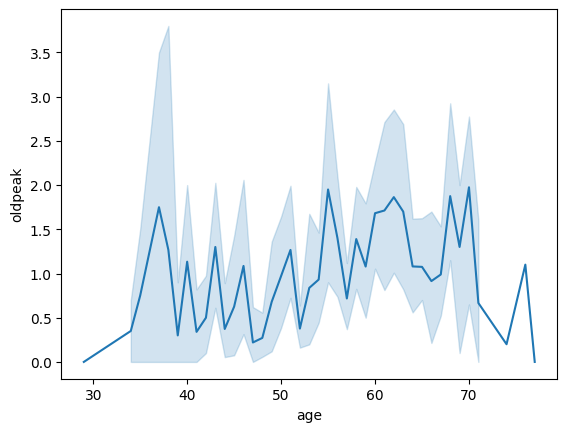

In [71]:
sns.lineplot(x=df['age'],y=df['oldpeak'],data=df)

<Axes: xlabel='sex', ylabel='oldpeak'>

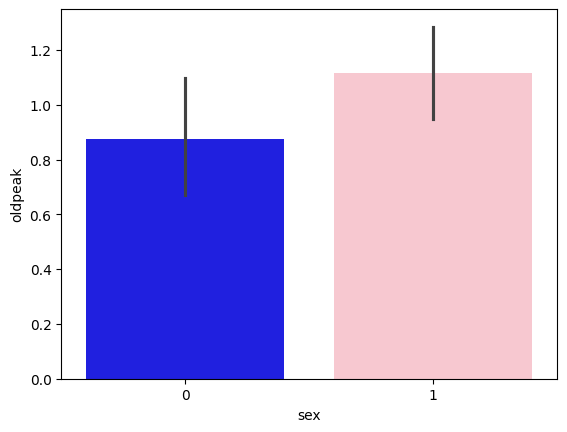

In [72]:
sns.barplot(x=df['sex'],y=df['oldpeak'],data=df, palette=['blue', 'pink'])

<Axes: xlabel='target', ylabel='exang'>

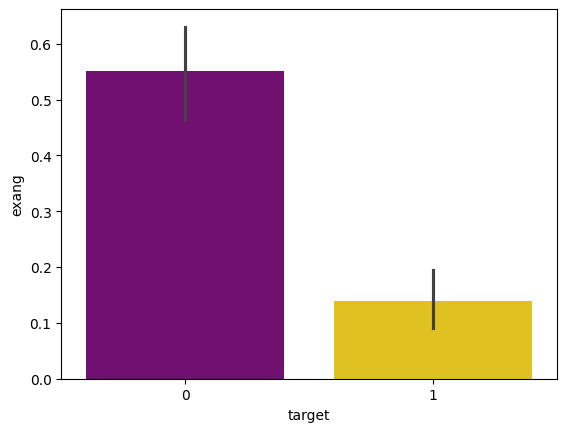

In [73]:
sns.barplot(x=df['target'],y=df['exang'],data=df, palette=['purple', 'gold'])

<Axes: xlabel='sex', ylabel='exang'>

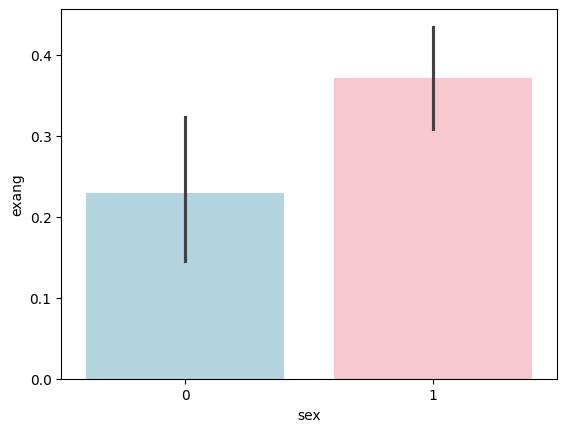

In [74]:
sns.barplot(x=df['sex'],y=df['exang'],data=df, palette=['lightblue', 'pink'])

<Axes: xlabel='target', ylabel='ca'>

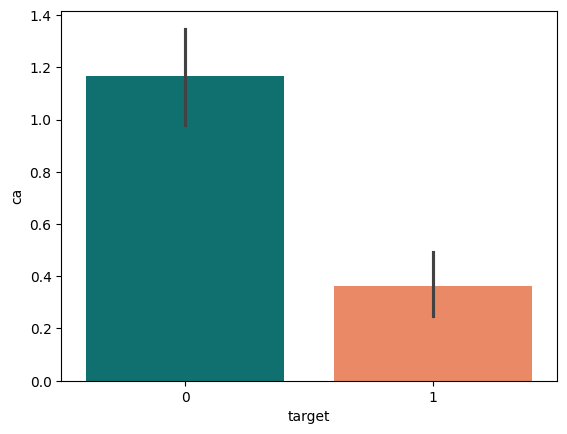

In [75]:
sns.barplot(x=df['target'],y=df['ca'],data=df, palette=['teal', 'coral'])

<Axes: xlabel='target', ylabel='thal'>

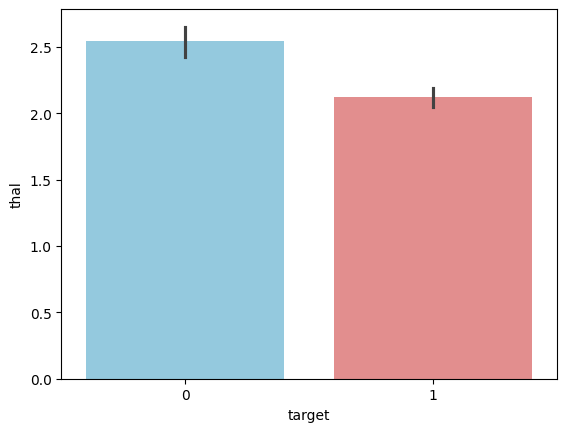

In [76]:
sns.barplot(x=df['target'],y=df['thal'],data=df, palette=['skyblue', 'lightcoral'])

<Axes: xlabel='sex', ylabel='fbs'>

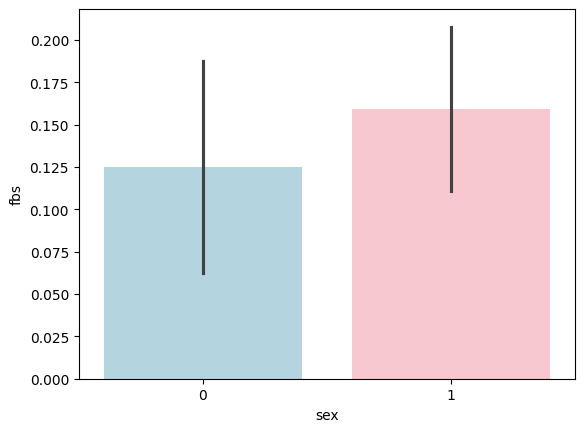

In [77]:
sns.barplot(x=df['sex'],y=df['fbs'],data=df, palette=['lightblue', 'pink'])

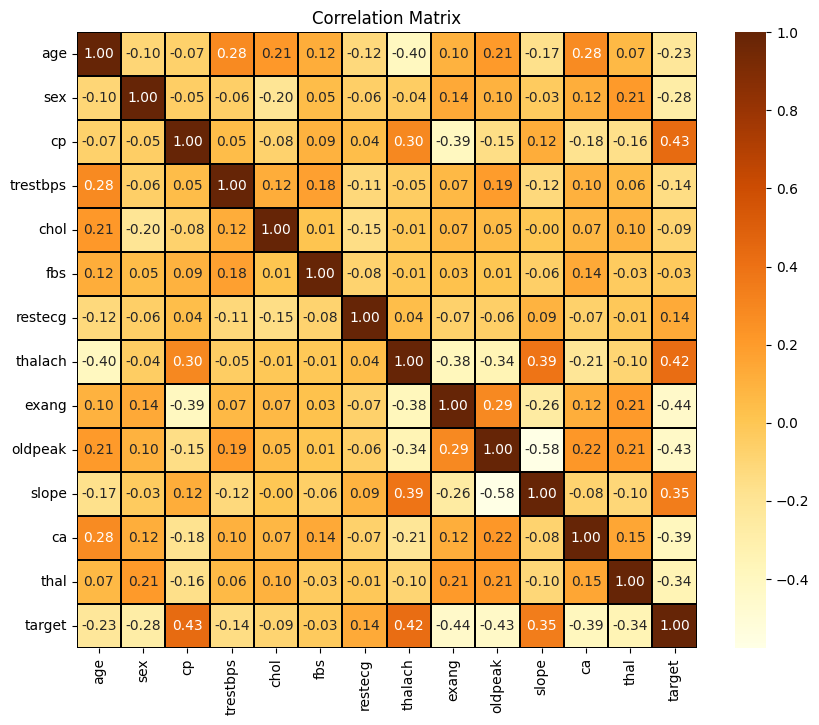

In [78]:
# Create a correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,linewidths= 0.2, linecolor= 'black', fmt=".2f", cmap="YlOrBr")
plt.title('Correlation Matrix')
plt.show()

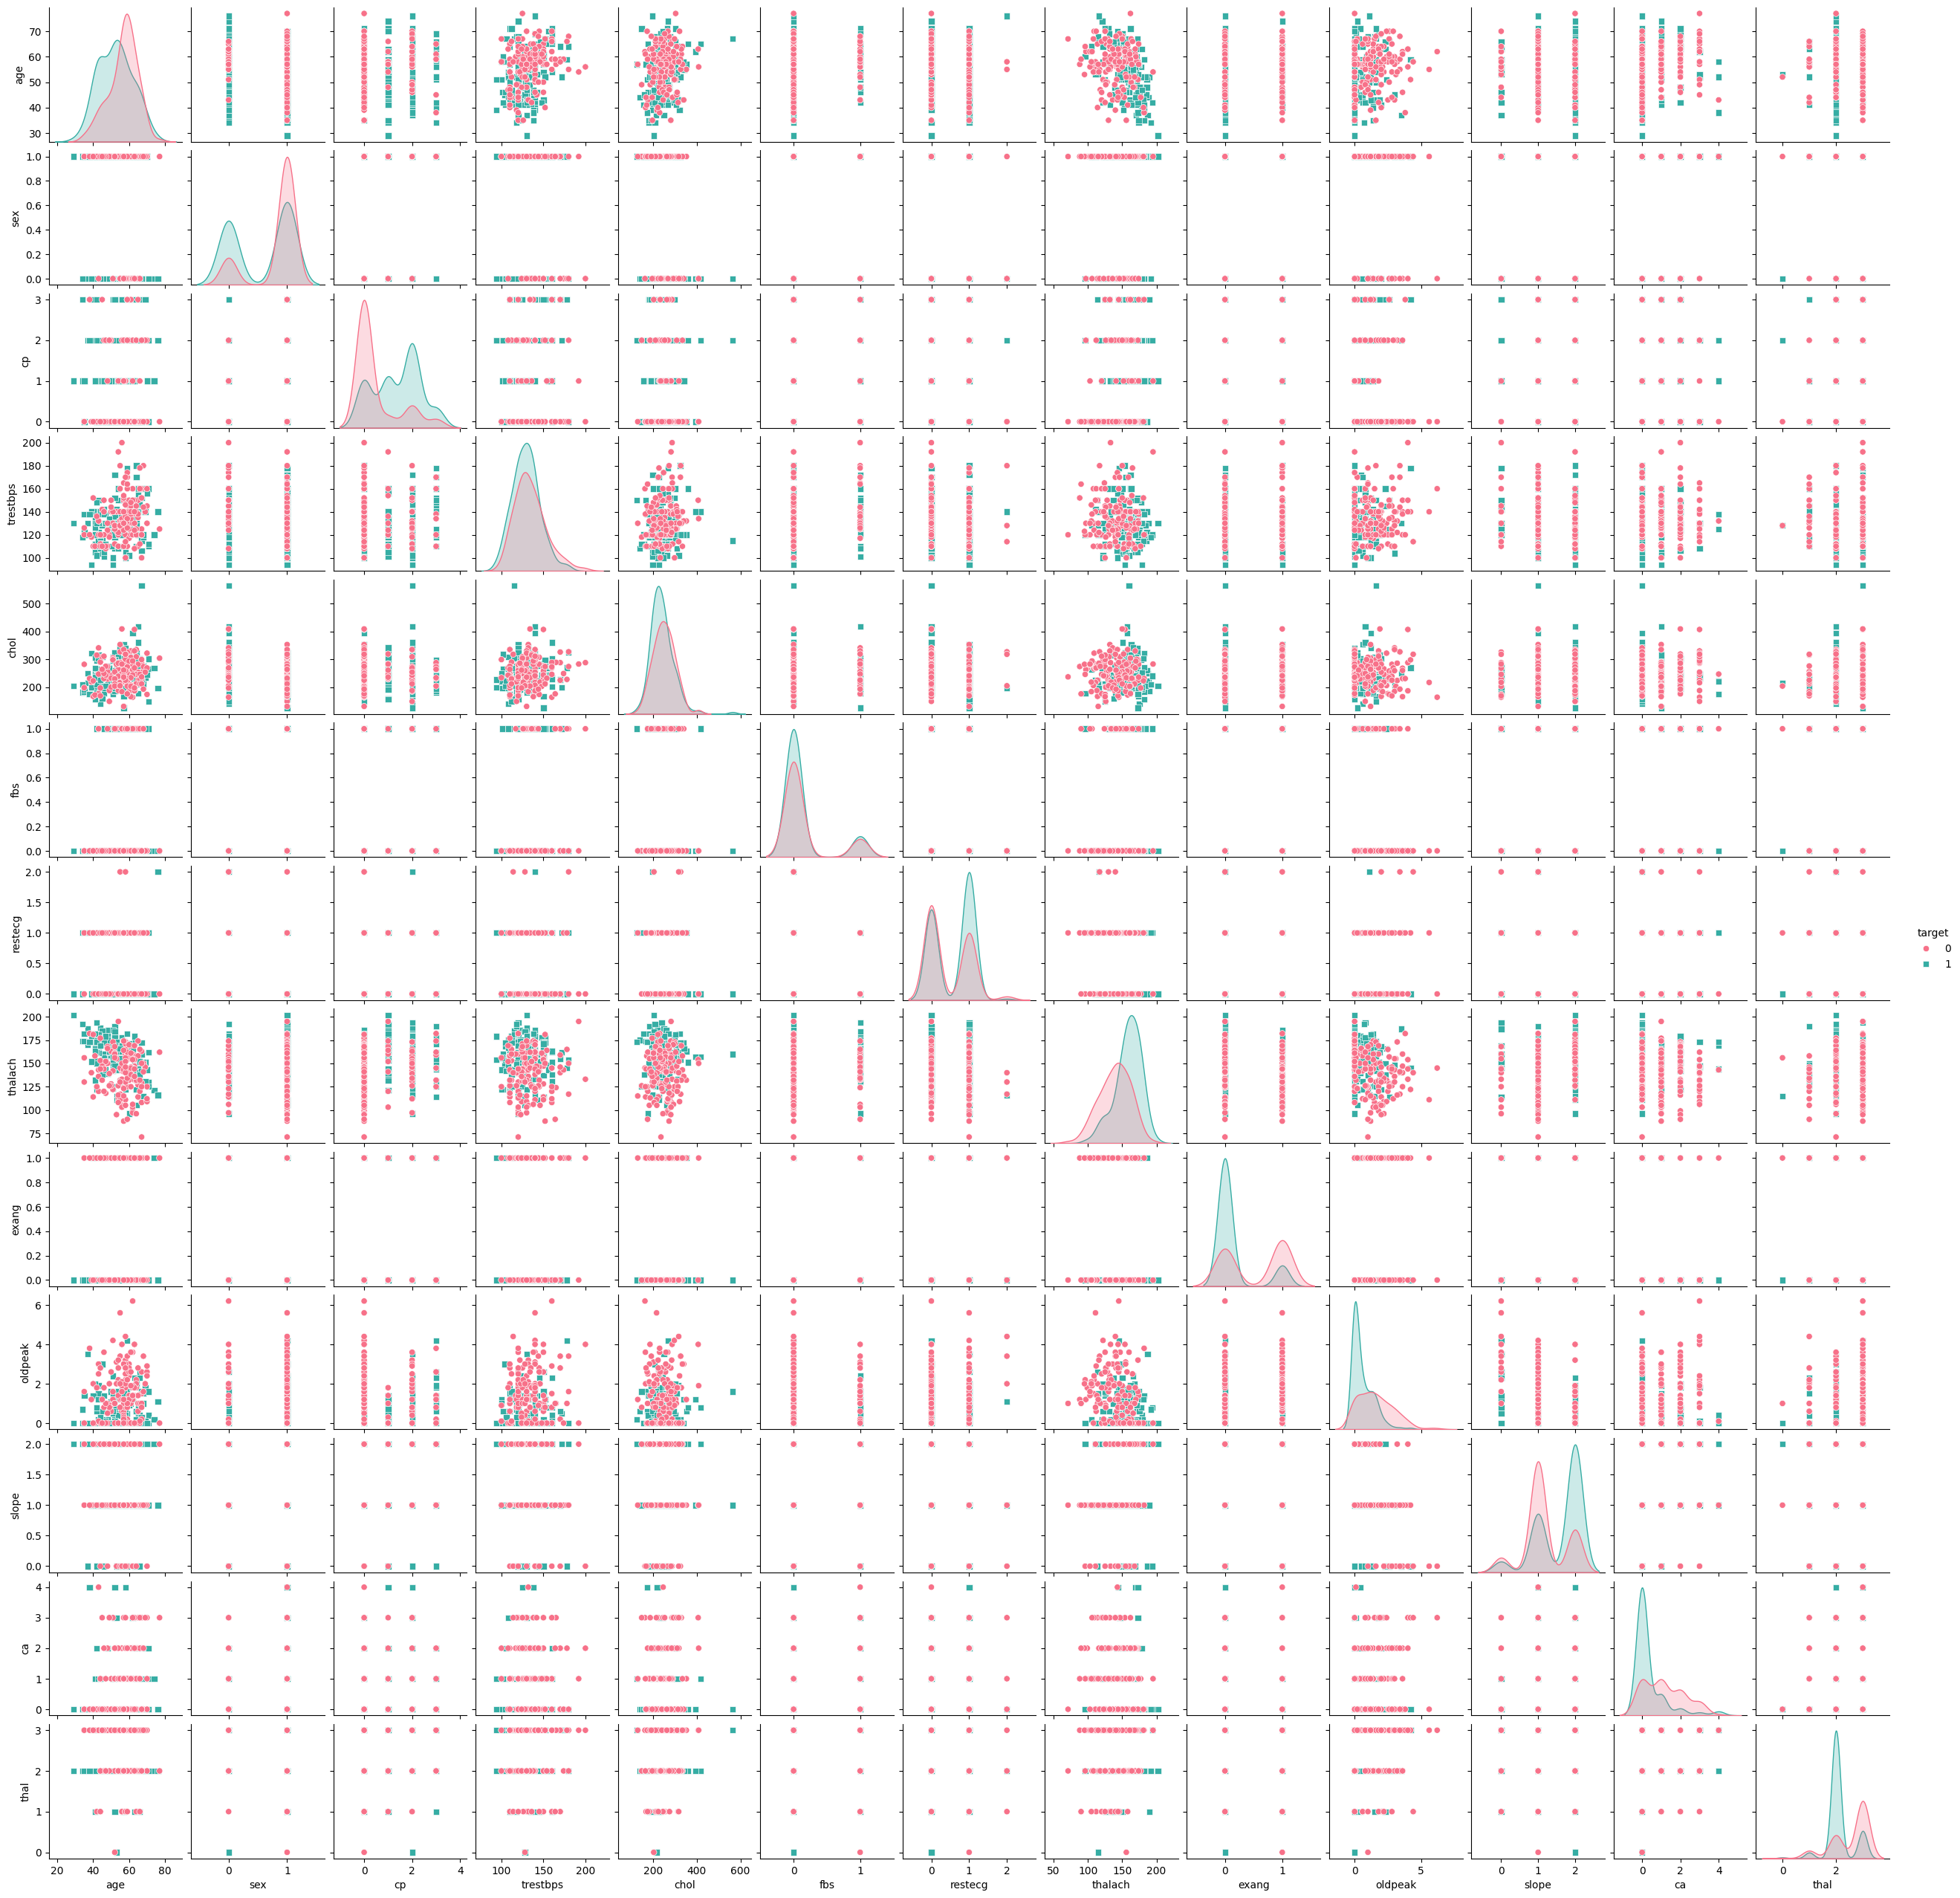

In [79]:
sns.pairplot(df,hue='target', diag_kind='kde', markers=["o", "s"], palette='husl', height=2)

In [80]:
#Data Preprocessing
#X = df.drop('target', axis=1)
#y = df['target']

In [81]:
#Convert categorical features to dummy variables 

#X = pd.get_dummies(X, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])


In [82]:
#Split the data into training and testing sets
#Assuming X and y are your features and target variable
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Feature Selection

In [83]:
from sklearn.feature_selection import SelectKBest, f_classif
X=df.drop('target', axis=1)
y=df['target']
# Select top 2 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=13)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))
# Get the scores for all features
scores = selector.scores_

# Combine feature names and their scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort by score (highest first)
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)
# 
# Display the scores
print(feature_scores)

X=X[selected_features]
y=df['target']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

Selected Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
     Feature      Score
0      exang  70.952438
1         cp  69.772271
2    oldpeak  68.551439
3    thalach  65.120104
4         ca  54.559834
5      slope  40.902071
6       thal  40.407696
7        sex  25.792191
8        age  16.116700
9   trestbps   6.458169
10   restecg   5.777209
11      chol   2.202983
12       fbs   0.236942


#  Model Development

In [84]:
# Model Development
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbour': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")


Training Logistic Regression...

LogisticRegression()
Accuracy: 0.9474
Precision: 0.9532
Recall: 0.9474
F1 Score: 0.9477

Training Decision Tree...

DecisionTreeClassifier()
Accuracy: 0.8421
Precision: 0.8852
Recall: 0.8421
F1 Score: 0.8421

Training Random Forest...

RandomForestClassifier()
Accuracy: 0.9474
Precision: 0.9532
Recall: 0.9474
F1 Score: 0.9477

Training Support Vector Machine...

SVC()
Accuracy: 0.6316
Precision: 0.6248
Recall: 0.6316
F1 Score: 0.6112

Training K-Nearest Neighbour...

KNeighborsClassifier()
Accuracy: 0.6842
Precision: 0.7029
Recall: 0.6842
F1 Score: 0.6860



# Cross-Validation

In [85]:
# Cross-Validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Average Accuracy: {cv_scores.mean():.4f}\n")


Cross-validation scores for Logistic Regression: [0.87096774 0.80645161 0.83870968 0.9        0.9        0.86666667
 0.83333333 0.86666667 0.7        0.73333333]
Average Accuracy: 0.8316

Cross-validation scores for Decision Tree: [0.80645161 0.83870968 0.87096774 0.83333333 0.76666667 0.73333333
 0.76666667 0.9        0.7        0.7       ]
Average Accuracy: 0.7916

Cross-validation scores for Random Forest: [0.90322581 0.80645161 0.83870968 0.9        0.9        0.76666667
 0.7        0.86666667 0.73333333 0.86666667]
Average Accuracy: 0.8282

Cross-validation scores for Support Vector Machine: [0.58064516 0.74193548 0.5483871  0.7        0.8        0.73333333
 0.6        0.7        0.56666667 0.63333333]
Average Accuracy: 0.6604

Cross-validation scores for K-Nearest Neighbour: [0.70967742 0.67741935 0.5483871  0.63333333 0.63333333 0.56666667
 0.76666667 0.7        0.53333333 0.76666667]
Average Accuracy: 0.6535



# Hyperparameter Tuning

In [86]:
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},

    'K-Nearest Neighbour': {
        'n_neighbors' : [5,7,9,11,13,15],
        'weights' : ['uniform','distance']
    }
}

# Hyperparameter Tuning
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    param_grid = param_grids[name]

    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}\n")


Tuning hyperparameters for Logistic Regression...
Best Parameters: {'C': 0.1}
Best Accuracy: 0.8416

Tuning hyperparameters for Decision Tree...
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Accuracy: 0.8049

Tuning hyperparameters for Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.8613

Tuning hyperparameters for Support Vector Machine...
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.8348

Tuning hyperparameters for K-Nearest Neighbour...
Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy: 0.6734



In [87]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter Tuning with RandomizedSearchCV
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    param_grid = param_grids[name]

    # RandomizedSearchCV with 20 iterations
    random_search = RandomizedSearchCV(
        model, param_distributions=param_grid, n_iter=20, 
        cv=10, scoring='accuracy', random_state=42, n_jobs=-1
    )
    random_search.fit(X, y)

    best_params = random_search.best_params_
    best_score = random_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Best Parameters: {'C': 0.1}
Best Accuracy: 0.8416

Tuning hyperparameters for Decision Tree...
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'gini'}
Best Accuracy: 0.7949

Tuning hyperparameters for Random Forest...
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Accuracy: 0.8482

Tuning hyperparameters for Support Vector Machine...
Best Parameters: {'kernel': 'linear', 'C': 0.1}
Best Accuracy: 0.8348

Tuning hyperparameters for K-Nearest Neighbour...
Best Parameters: {'weights': 'uniform', 'n_neighbors': 7}
Best Accuracy: 0.6734



In [88]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning with Bayesian Optimization
def objective(trial, model_name):
    if model_name == 'Logistic Regression':
        C = trial.suggest_loguniform('C', 0.001, 100)
        model = LogisticRegression(C=C, max_iter=1000)
    elif model_name == 'Decision Tree':
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        max_depth = trial.suggest_int('max_depth', 2, 30, step=2)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
        model = DecisionTreeClassifier(
            criterion=criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        )
    elif model_name == 'Random Forest':
        n_estimators = trial.suggest_int('n_estimators', 50, 150, step=10)
        max_depth = trial.suggest_int('max_depth', 2, 30, step=2)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        )
    elif model_name == 'Support Vector Machine':
        C = trial.suggest_loguniform('C', 0.1, 10)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
        model = SVC(C=C, kernel=kernel)
    elif model_name == 'K-Nearest Neighbour':
        n_neighbors = trial.suggest_categorical('n_neighbors', [5, 7, 9, 11, 13, 15])
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

    # Perform cross-validation
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy', n_jobs=-1).mean()
    return score

# Running Bayesian Optimization for each model
for model_name in models.keys():
    print(f"Tuning hyperparameters for {model_name}...")

    # Define the study
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name), n_trials=20)

    # Get best parameters and best score
    best_params = study.best_params
    best_score = study.best_value

    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Accuracy for {model_name}: {best_score:.4f}\n")


[I 2025-06-06 21:30:41,537] A new study created in memory with name: no-name-9e0020e9-46b8-47d7-949b-c09048216419
[I 2025-06-06 21:30:41,718] Trial 0 finished with value: 0.8116129032258066 and parameters: {'C': 7.458618635774262}. Best is trial 0 with value: 0.8116129032258066.


Tuning hyperparameters for Logistic Regression...


[I 2025-06-06 21:30:41,829] Trial 1 finished with value: 0.8317204301075268 and parameters: {'C': 0.07992292936832605}. Best is trial 1 with value: 0.8317204301075268.
[I 2025-06-06 21:30:42,014] Trial 2 finished with value: 0.8116129032258066 and parameters: {'C': 19.373937893781957}. Best is trial 1 with value: 0.8317204301075268.
[I 2025-06-06 21:30:42,188] Trial 3 finished with value: 0.8182795698924732 and parameters: {'C': 0.5913138816791729}. Best is trial 1 with value: 0.8317204301075268.
[I 2025-06-06 21:30:42,263] Trial 4 finished with value: 0.7393548387096774 and parameters: {'C': 0.00397032192698735}. Best is trial 1 with value: 0.8317204301075268.
[I 2025-06-06 21:30:42,434] Trial 5 finished with value: 0.8348387096774192 and parameters: {'C': 0.15992943947032429}. Best is trial 5 with value: 0.8348387096774192.
[I 2025-06-06 21:30:42,607] Trial 6 finished with value: 0.8116129032258066 and parameters: {'C': 18.309125783785}. Best is trial 5 with value: 0.8348387096774192

Best Parameters for Logistic Regression: {'C': 0.06788239809542637}
Best Accuracy for Logistic Regression: 0.8416

Tuning hyperparameters for Decision Tree...


[I 2025-06-06 21:30:44,494] Trial 7 finished with value: 0.7786021505376345 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8049462365591398.
[I 2025-06-06 21:30:44,522] Trial 8 finished with value: 0.7653763440860215 and parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8049462365591398.
[I 2025-06-06 21:30:44,551] Trial 9 finished with value: 0.7917204301075269 and parameters: {'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8049462365591398.
[I 2025-06-06 21:30:44,589] Trial 10 finished with value: 0.7850537634408603 and parameters: {'criterion': 'gini', 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8049462365591398.
[I 2025-06-06 21:30:44,628] Trial 11 finished with value: 0.7950537634408603 and parame

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 4}
Best Accuracy for Decision Tree: 0.8049

Tuning hyperparameters for Random Forest...


[I 2025-06-06 21:30:45,298] Trial 0 finished with value: 0.831505376344086 and parameters: {'n_estimators': 130, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.831505376344086.
[I 2025-06-06 21:30:45,551] Trial 1 finished with value: 0.8348387096774192 and parameters: {'n_estimators': 110, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8348387096774192.
[I 2025-06-06 21:30:45,673] Trial 2 finished with value: 0.8415053763440861 and parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.8415053763440861.
[I 2025-06-06 21:30:45,915] Trial 3 finished with value: 0.8415053763440861 and parameters: {'n_estimators': 110, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.8415053763440861.
[I 2025-06-06 21:30:46,088] Trial 4 finished with value: 0.8480645161290322 and parameters: {'n_

Best Parameters for Random Forest: {'n_estimators': 70, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 3}
Best Accuracy for Random Forest: 0.8481

Tuning hyperparameters for Support Vector Machine...


[I 2025-06-06 21:30:56,498] Trial 1 finished with value: 0.8381720430107527 and parameters: {'C': 7.548017238912443, 'kernel': 'linear'}. Best is trial 1 with value: 0.8381720430107527.
[I 2025-06-06 21:30:57,082] Trial 2 finished with value: 0.8447311827956989 and parameters: {'C': 0.3652892453182224, 'kernel': 'linear'}. Best is trial 2 with value: 0.8447311827956989.
[I 2025-06-06 21:30:57,117] Trial 3 finished with value: 0.5575268817204301 and parameters: {'C': 0.24343116360755704, 'kernel': 'rbf'}. Best is trial 2 with value: 0.8447311827956989.
[I 2025-06-06 21:30:57,157] Trial 4 finished with value: 0.6041935483870967 and parameters: {'C': 0.35629112989021317, 'kernel': 'rbf'}. Best is trial 2 with value: 0.8447311827956989.
[I 2025-06-06 21:30:57,528] Trial 5 finished with value: 0.8447311827956989 and parameters: {'C': 0.2923325469448843, 'kernel': 'linear'}. Best is trial 2 with value: 0.8447311827956989.
[I 2025-06-06 21:30:57,558] Trial 6 finished with value: 0.64032258064

Best Parameters for Support Vector Machine: {'C': 0.3652892453182224, 'kernel': 'linear'}
Best Accuracy for Support Vector Machine: 0.8447

Tuning hyperparameters for K-Nearest Neighbour...


[I 2025-06-06 21:31:18,236] Trial 7 finished with value: 0.6536559139784945 and parameters: {'n_neighbors': 9, 'weights': 'distance'}. Best is trial 4 with value: 0.6705376344086023.
[I 2025-06-06 21:31:18,263] Trial 8 finished with value: 0.6604301075268817 and parameters: {'n_neighbors': 9, 'weights': 'uniform'}. Best is trial 4 with value: 0.6705376344086023.
[I 2025-06-06 21:31:18,290] Trial 9 finished with value: 0.6536559139784945 and parameters: {'n_neighbors': 9, 'weights': 'distance'}. Best is trial 4 with value: 0.6705376344086023.
[I 2025-06-06 21:31:18,319] Trial 10 finished with value: 0.6705376344086023 and parameters: {'n_neighbors': 15, 'weights': 'uniform'}. Best is trial 4 with value: 0.6705376344086023.
[I 2025-06-06 21:31:18,347] Trial 11 finished with value: 0.6705376344086023 and parameters: {'n_neighbors': 15, 'weights': 'uniform'}. Best is trial 4 with value: 0.6705376344086023.
[I 2025-06-06 21:31:18,375] Trial 12 finished with value: 0.6705376344086023 and par

Best Parameters for K-Nearest Neighbour: {'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy for K-Nearest Neighbour: 0.6734



# Validation and Testing

In [89]:
# Validation and Testing
for name, model in models.items():
    print(f"Testing {name} on validation set...")
    y_val_pred = model.predict(X_val)

    # Model Evaluation on Validation Set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    print(f"\n{model}\nValidation Accuracy: {val_accuracy:.4f}\nValidation Precision: {val_precision:.4f}\nValidation Recall: {val_recall:.4f}\nValidation F1 Score: {val_f1:.4f}\n")

    # Testing
    print(f"Testing {name} on test set...")
    y_test_pred = model.predict(X_test)

    # Model Evaluation on Test Set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"\n{model}\nTest Accuracy: {test_accuracy:.4f}\nTest Precision: {test_precision:.4f}\nTest Recall: {test_recall:.4f}\nTest F1 Score: {test_f1:.4f}\n")


Testing Logistic Regression on validation set...

LogisticRegression()
Validation Accuracy: 0.8596
Validation Precision: 0.8659
Validation Recall: 0.8596
Validation F1 Score: 0.8584

Testing Logistic Regression on test set...

LogisticRegression()
Test Accuracy: 0.9474
Test Precision: 0.9532
Test Recall: 0.9474
Test F1 Score: 0.9477

Testing Decision Tree on validation set...

DecisionTreeClassifier()
Validation Accuracy: 0.7719
Validation Precision: 0.7718
Validation Recall: 0.7719
Validation F1 Score: 0.7716

Testing Decision Tree on test set...

DecisionTreeClassifier()
Test Accuracy: 0.8421
Test Precision: 0.8852
Test Recall: 0.8421
Test F1 Score: 0.8421

Testing Random Forest on validation set...

RandomForestClassifier()
Validation Accuracy: 0.8070
Validation Precision: 0.8094
Validation Recall: 0.8070
Validation F1 Score: 0.8059

Testing Random Forest on test set...

RandomForestClassifier()
Test Accuracy: 0.9474
Test Precision: 0.9532
Test Recall: 0.9474
Test F1 Score: 0.9477



Testing Logistic Regression on validation set...
Testing Logistic Regression on test set...


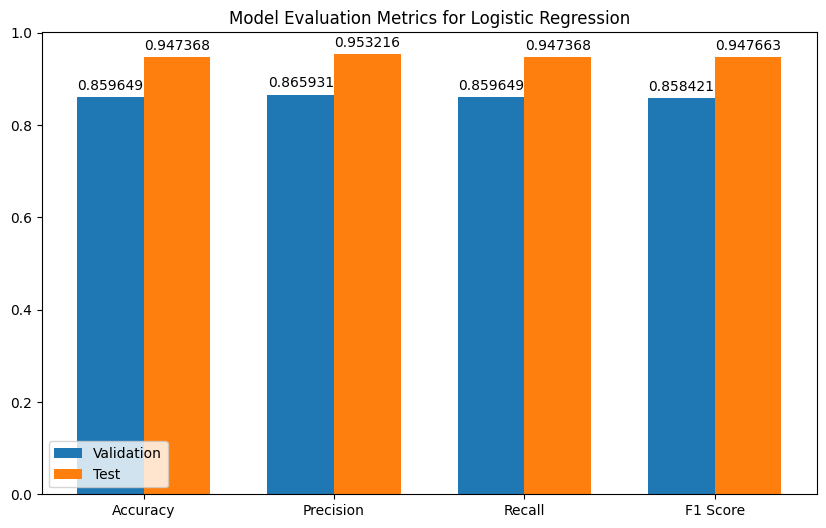

Testing Decision Tree on validation set...
Testing Decision Tree on test set...


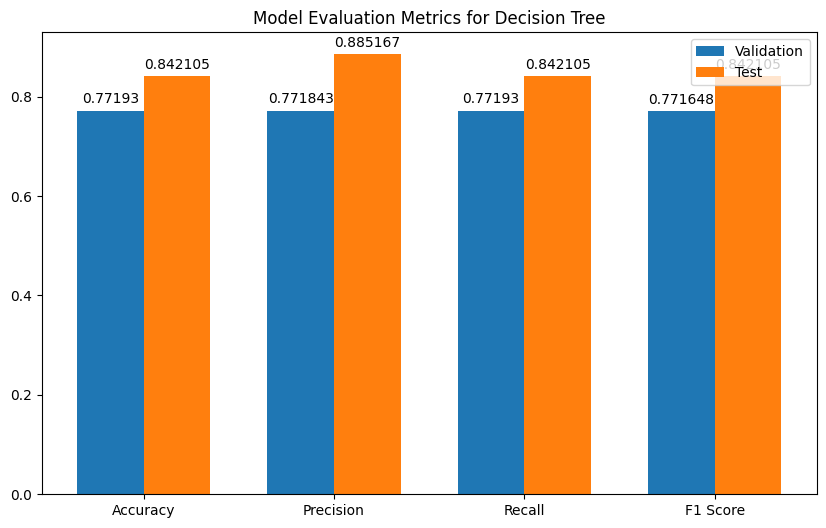

Testing Random Forest on validation set...
Testing Random Forest on test set...


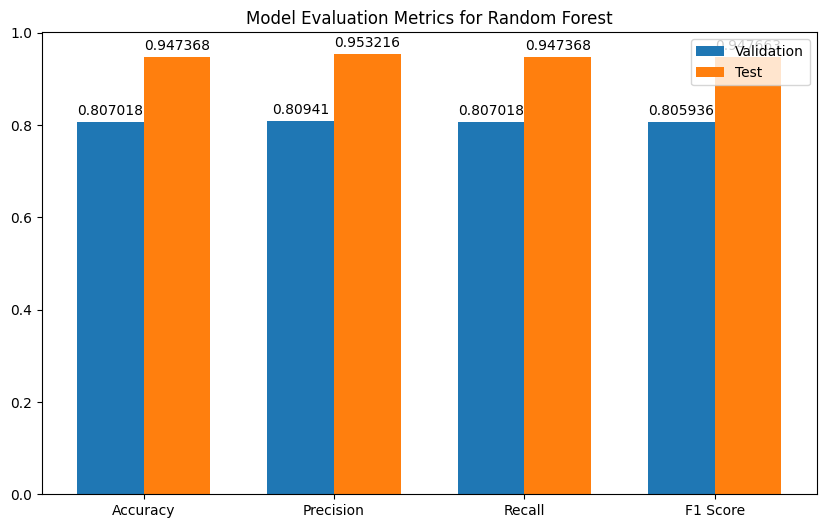

Testing Support Vector Machine on validation set...
Testing Support Vector Machine on test set...


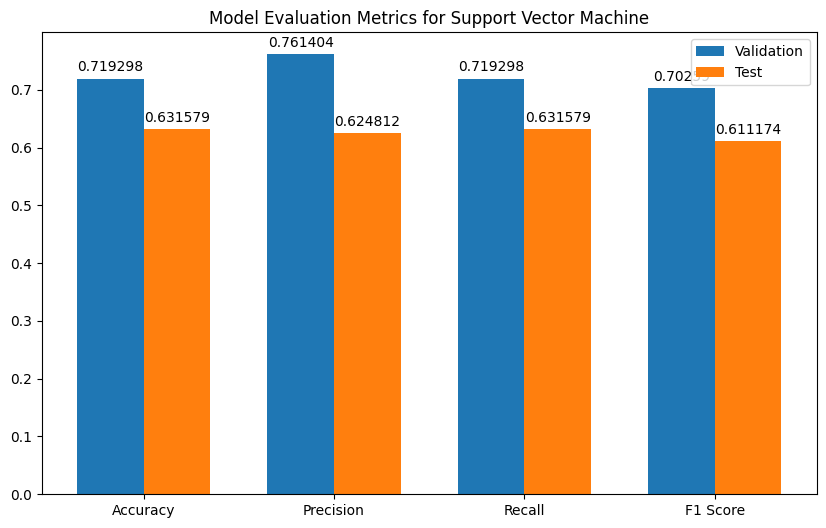

Testing K-Nearest Neighbour on validation set...
Testing K-Nearest Neighbour on test set...


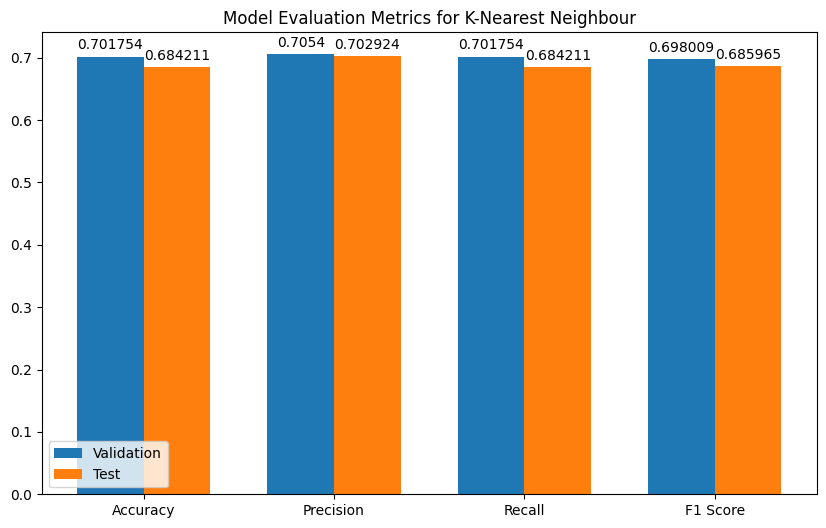

In [90]:
# Validation and Testing
for name, model in models.items():
    print(f"Testing {name} on validation set...")
    y_val_pred = model.predict(X_val)

    # Model Evaluation on Validation Set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Testing
    print(f"Testing {name} on test set...")
    y_test_pred = model.predict(X_test)

    # Model Evaluation on Test Set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    val_scores = [val_accuracy, val_precision, val_recall, val_f1]
    test_scores = [test_accuracy, test_precision, test_recall, test_f1]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, val_scores, width, label='Validation')
    rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    plt.title(f'Model Evaluation Metrics for {name}')
    plt.show()


# Confusion Matrix

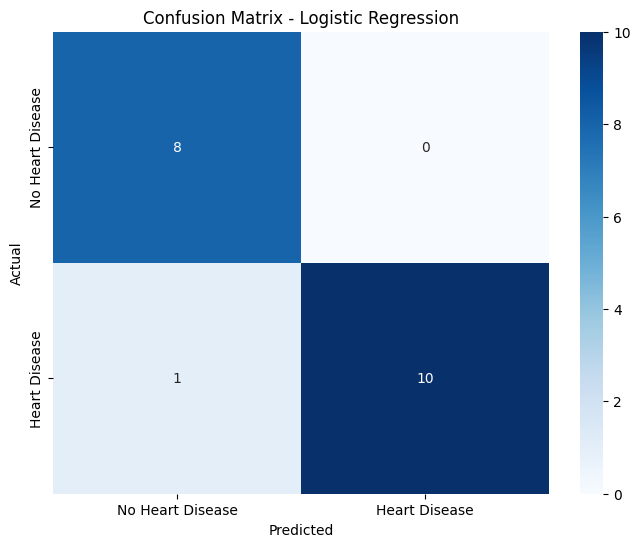

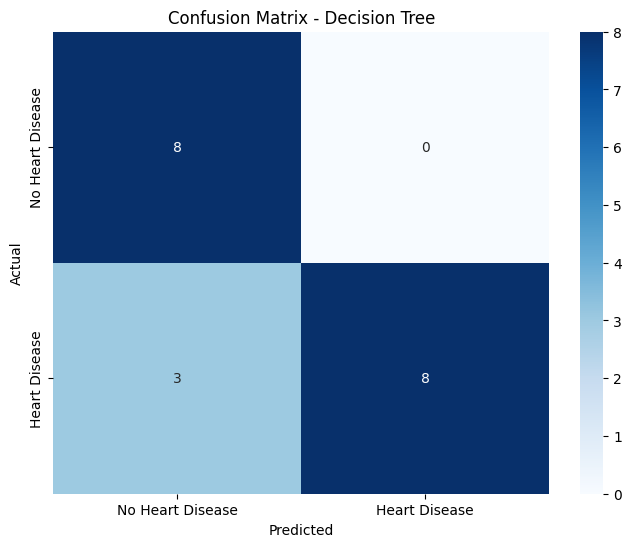

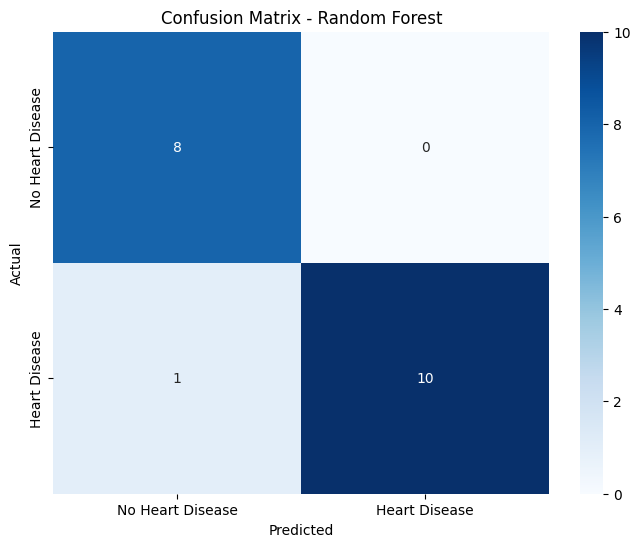

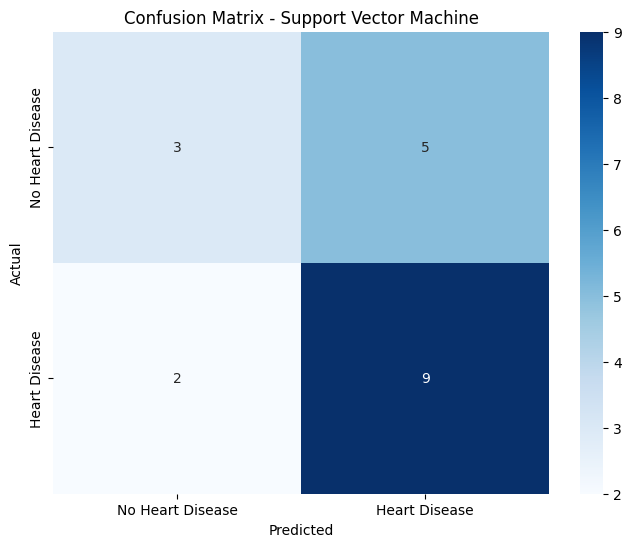

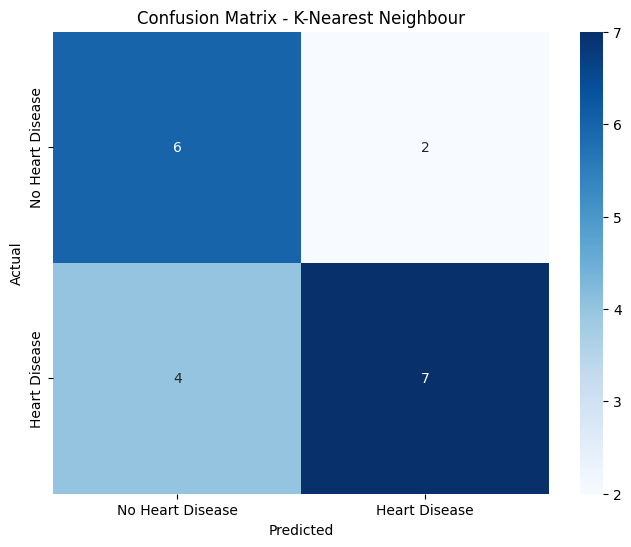

In [91]:
# Confusion Matrix for each model
for name, model in models.items():
    # Predictions on test set
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


# Updating Hyperparameters

In [92]:
# Define best hyperparameters from tuning
best_hyperparameters = {
    'Logistic Regression': {'C': 0.1},
    'Decision Tree': {
        'criterion': 'gini', 
        'max_depth': 20, 
        'min_samples_split': 2, 
        'min_samples_leaf': 4
    },
    'Random Forest': {
        'n_estimators': 50, 
        'max_depth': 10, 
        'min_samples_split': 10, 
        'min_samples_leaf': 2
    },
    'Support Vector Machine': {'C': 0.329702284383762, 'kernel': 'linear'},

    'K-Nearest Neighbour': {
        'n_neighbors' : 7,
        'weights' : 'uniform'
    }
}

# Update models with the best hyperparameters
for model_name, model in models.items():
    print(f"Updating hyperparameters for {model_name}...")
    model.set_params(**best_hyperparameters[model_name])
    print(f"Updated {model_name} with hyperparameters: {model.get_params()}")

Updating hyperparameters for Logistic Regression...
Updated Logistic Regression with hyperparameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Updating hyperparameters for Decision Tree...
Updated Decision Tree with hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Updating hyperparameters for Random Forest...
Updated Random Forest with hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nod

# Training Updated Model

In [93]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")


Training Logistic Regression...

LogisticRegression(C=0.1)
Accuracy: 0.9474
Precision: 0.9532
Recall: 0.9474
F1 Score: 0.9477

Training Decision Tree...

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4)
Accuracy: 0.7895
Precision: 0.8596
Recall: 0.7895
F1 Score: 0.7871

Training Random Forest...

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)
Accuracy: 0.9474
Precision: 0.9532
Recall: 0.9474
F1 Score: 0.9477

Training Support Vector Machine...

SVC(C=0.329702284383762, kernel='linear')
Accuracy: 0.9474
Precision: 0.9532
Recall: 0.9474
F1 Score: 0.9477

Training K-Nearest Neighbour...

KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.7895
Precision: 0.8094
Recall: 0.7895
F1 Score: 0.7906



# Testing Updated Model

In [94]:
# Validation and Testing
for name, model in models.items():
    # Testing
    print(f"Testing {name} on test set...")
    y_test_pred = model.predict(X_test)

    # Model Evaluation on Test Set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"\n{model}\nTest Accuracy: {test_accuracy:.4f}\nTest Precision: {test_precision:.4f}\nTest Recall: {test_recall:.4f}\nTest F1 Score: {test_f1:.4f}\n")


Testing Logistic Regression on test set...

LogisticRegression(C=0.1)
Test Accuracy: 0.9474
Test Precision: 0.9532
Test Recall: 0.9474
Test F1 Score: 0.9477

Testing Decision Tree on test set...

DecisionTreeClassifier(max_depth=20, min_samples_leaf=4)
Test Accuracy: 0.7895
Test Precision: 0.8596
Test Recall: 0.7895
Test F1 Score: 0.7871

Testing Random Forest on test set...

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)
Test Accuracy: 0.9474
Test Precision: 0.9532
Test Recall: 0.9474
Test F1 Score: 0.9477

Testing Support Vector Machine on test set...

SVC(C=0.329702284383762, kernel='linear')
Test Accuracy: 0.9474
Test Precision: 0.9532
Test Recall: 0.9474
Test F1 Score: 0.9477

Testing K-Nearest Neighbour on test set...

KNeighborsClassifier(n_neighbors=7)
Test Accuracy: 0.7895
Test Precision: 0.8094
Test Recall: 0.7895
Test F1 Score: 0.7906



# Save the model

In [102]:
# Train the final model on full training data
final_model = LogisticRegression(C=0.1)

final_model.fit(X_train, y_train)

# Save the model using joblib
import joblib
joblib.dump(final_model, 'final_logistic_regression_model.pkl')

['final_logistic_regression_model.pkl']

# Test the final model

In [103]:
# Load the model
loaded_model = joblib.load('final_logistic_regression_model.pkl')

# Use it for prediction
y_pred = loaded_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n{loaded_model}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")


LogisticRegression(C=0.1)
Accuracy: 0.9474
Precision: 0.9532
Recall: 0.9474
F1 Score: 0.9477



In [105]:
loaded_model = joblib.load('final_logistic_regression_model.pkl')
print(loaded_model.predict([[63,1,0,130,254,0,0,147,0,1.4,1,1,3]]))

[0]
